# Reducing Loss

## Object
* Discover how to train a model using an iterative approach.
* Understand full gradient descent and some variants, including:
    * mini-batch gradient descent
    * stochastic gradient descent
* Experiment with learning rate.

## 如何減小誤差
1. 上次學習了如何計算誤差(MSE)。這次要學習如何選擇一組合適的模型參數來盡可能減小誤差
2. 通過反覆的運算，每次運算都要找到一組模型參數，可以獲得比前一次運算更小的誤差
3. 可以透過計算**梯度**來找模型參數，也就是計算誤差函數的導數，這樣我們就可以有效率的更新模型參數

## Gradient Descent and Tunning Model

![](./study_02_pics/image.png)

## 遙想當年的微積分...

微分描述了當函數的局部變化的程度。也就是說，透過微分可以近似地描述，當函數自變量 $x$ 非常小的改變時，函數的值 $f(x)$ 會變成怎麼樣。

![](study_02_pics/beaut_math_tech.png)

In [210]:
from IPython.display import HTML, IFrame

# Youtube
HTML('<iframe width="560" height="315" \
     src="https://www.youtube.com/embed/TD_hAqaUudo" \
     frameborder="0" \
     allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" \
     allowfullscreen></iframe>')

$ y' = f(x) = wx + c $

誤差可以定義為 

$ (y' - y)^2 = (f(x) - y)^2 = ((wx + c) - y)^2$

對 $w$ 做微分

$ 2(wx + c - y) \cdot (x)$

對 $c$ 做微分

$ 2(wx + c - y)$

## 如果是很多的 $x_i$ 與對應的 $y_i$ 的話...

誤差定義: 

$ (y_1-y_1')^2 + (y_2-y_2')^2 + (y_3-y_3')^2 + ... + (y_N-y'_N)^2$

$ = \sum_{n=1}^{N} (y_n - y'_{n})^2 $

$ = \sum_{n=1}^{N} ((wx_{n}+c) - y'_{n})^2 $

對 $w$ 做微分

$ \sum_{n=1}^N 2(wx_n + c - y_n) \cdot x_n $

對 $c$ 做微分

$ \sum_{n=1}^N 2(wx_n + c - y_n) $

# 尋找 Loss function 的最小值

![](./study_02_pics/loss_vs_weight_1.png)

## Starting Point

![](./study_02_pics/loss_vs_weight_2.png)

## Gradient

![](./study_02_pics/loss_vs_weight_3.png)

## Learning Rate

###  Small Learning Rate

![](./study_02_pics/learning_rate_1.png)

## Overshoting (too large learning rate)

![](./study_02_pics/learning_rate_2.png)

## Get There Efficiently

![](./study_02_pics/learning_rate_3.png)

## Execise

[https://developers.google.com/machine-learning/crash-course/fitter/graph](https://developers.google.com/machine-learning/crash-course/fitter/graph)

![](./study_02_pics/ex_1.png)

## Gradient descent

A technique to minimize loss by computing the gradients of loss with respect to the model's parameters, conditioned on training data. Informally, gradient descent iteratively adjusts parameters, gradually finding the best combination of weights and bias to minimize loss.

## Stochastic Gradient Descent

Stochastic gradient descent (SGD) takes this idea to the extreme--it uses only a single example (a batch size of 1) per iteration. Given enough iterations, SGD works but is very noisy. The term "stochastic" indicates that the one example comprising each batch is chosen at random.

## Mini-batch Stochastic Gradient Descent (mini-batch SGD) 

Mini-batch stochastic gradient descent (mini-batch SGD) is a compromise between full-batch iteration and SGD. A mini-batch is typically between 10 and 1,000 examples, chosen at random. Mini-batch SGD reduces the amount of noise in SGD but is still more efficient than full-batch.

## Playground

[https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise](https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise)

![](./study_02_pics/playground.png)

## Check Your Understanding: Batch Size

![](./study_02_pics/Q_A.png)

![](./study_02_pics/QA_2.png)

## 問題

從 "Value of Weight vs. Loss" 的圖來看，哪一點最低不就已經知道了嗎？為何還要 Gradient Descent 來找？

## 從頭到尾做一次就知道原因了

1. 產生一組資料 $ y = 3 \cdot x + noise $，這裡的係數 3 是我們要找的答案喔，只是在這裡先給大家看。

2. 我們想要訓練一個線性的模型 $y' = w \cdot x$ 來做預測。

3. 定義誤差 Loss 

$ MSE =  \frac{1}{N}(y-y')^2 $

$ = \frac{1}{N}(y - wx) ^ 2 $

$ = \frac{1}{N}(y^2 - 2wxy + w^2x^2) $

4. 則 $MSE$ 對 $w$ 的微分為 

$\frac{1}{N}(-2xy+2wx^2)$

5. 一開始先來訂一個要猜的 $w$ 初始值，先來試試是 $w=1$ 好了。

6. 把 $w=1$ 帶進去算會得到一個 $MSE$，那接下來要 $w$ 變成多少才會讓誤差更小呢？而新猜的 w 的 $MSE$ 是多少？

7. 所以我們一開始是不知道 "Values of weight vs. Loss " 的圖的喔！要一直變化 $w$ 才能找到。

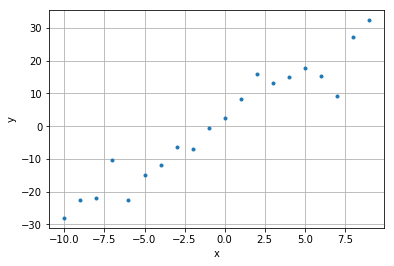

In [220]:
import numpy as np
from matplotlib import pyplot as plt

func_y = lambda x: 3 * x + 5 * np.random.randn()

x = np.arange(-10, 10)
y = [func_y(k) for k in x]
plt.plot(np.arange(-10, 10), y, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [221]:
# 定義一個模型
def model(x, w):
    y_pred = w * x
    return y_pred

# 定義 Loss 的計算方法
def loss(y, y_pred):
    MSE = np.mean((y_pred - y) ** 2)
    return MSE

# y = wx 的 gradient descent 
def grad_descent(x, y, w):
    grad_descent = np.mean(-2 * x * y + 2 * w * x ** 2)
    return grad_descent

Model: $y' = w \cdot x$ 

$MSE = \frac{1}{N} (y-y') ^2$ 

$Gradent Descent = \frac{1}{N}(-2xy+2wx^2)$

In [224]:
# 初始值
w_history = []
loss_history = []

In [222]:
# 尋找最好的 w
def cal_and_plot(w):
    # w = 5
    y_pred = model(x, w)

    fig, (ax_0, ax_1) = plt.subplots(1, 2, figsize=(15, 5))

    ax_0.plot(x, y, '.')
    ax_0.plot(x, y_pred, 'r-')
    ax_0.set_xlabel('x')
    ax_0.set_ylabel('y')
    ax_0.grid()

    loss_val = loss(y, y_pred)
    grad_descent_val = grad_descent(x, y, w)

    print('Loss: {}'.format(loss_val))
    print('Gradient: {}'.format(grad_descent_val))

    w_history.extend([w])
    loss_history.extend([loss_val])

    ax_1.plot(w_history, loss_history, 'g*')
    ax_1.plot(w_history[-1], loss_history[-1], 'r*')
    ax_1.set_xlim(-3, 7)
    ax_1.grid(), ax_1.set_xlabel('Value of Weight'), ax_1.set_ylabel('Loss')

Loss: 25.880904066803623
Gradient: 0.3573879290355862


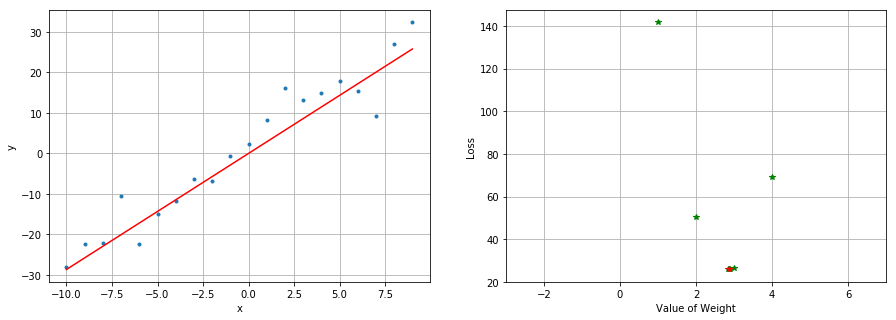

In [231]:
cal_and_plot(w=2.865) # cal_and_plot

In [70]:
from ipywidgets import IntText
import ipywidgets as widgets

@widgets.interact_manual(color=['blue', 'red', 'green'], lw=(1., 10.))
def plot(freq=1., color='red', lw=2, grid=True, title='x123'):
    t = np.linspace(-1., +1., 1000)
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.plot(t, np.sin(2 * np.pi * freq * t),
            lw=lw, color=color)
    ax.set_title(title)
    ax.grid(grid)

interactive(children=(FloatSlider(value=1.0, description='freq', max=3.0, min=-1.0), Dropdown(description='col…